In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report
import xgboost as xgb
import tensorflow as tf

In [33]:
df=pd.read_csv('../data/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [35]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [36]:
df.describe(include='object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


<Axes: xlabel='RainToday', ylabel='count'>

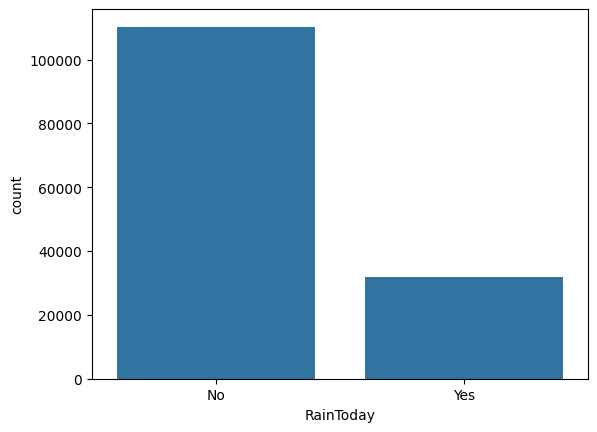

In [37]:
sns.countplot(x=df['RainToday'])

<Axes: xlabel='RainTomorrow', ylabel='count'>

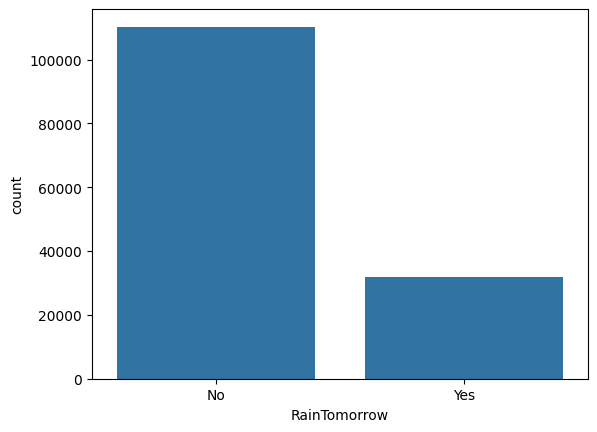

In [38]:
sns.countplot(x=df['RainTomorrow'])

In [39]:
print(df['RainToday'].value_counts())
print(df['RainTomorrow'].value_counts())

RainToday
No     110319
Yes     31880
Name: count, dtype: int64
RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [41]:
lb=LabelEncoder()
df['RainToday']=lb.fit_transform(df['RainToday'])
df['RainTomorrow']=lb.fit_transform(df['RainTomorrow'])
df['Location']=lb.fit_transform(df['Location'])
df['WindGustDir']=lb.fit_transform(df['WindGustDir'])
df['WindDir9am']=lb.fit_transform(df['WindDir9am'])
df['WindDir3pm']=lb.fit_transform(df['WindDir3pm'])

<Axes: xlabel='RainTomorrow', ylabel='count'>

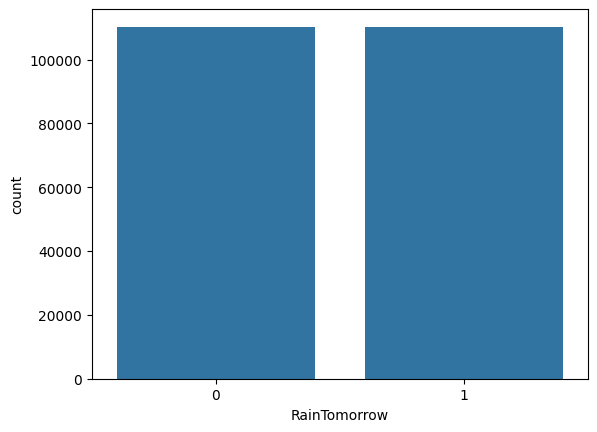

In [42]:
yes = df[df['RainTomorrow'] == 1]
no = df[df['RainTomorrow'] == 0]
yes_oversample=resample(yes,replace=True,n_samples=len(no),random_state=42)

data=pd.concat([no,yes_oversample])

sns.countplot(data, x='RainTomorrow')

In [43]:
data['RainTomorrow']

0        0
1        0
2        0
3        0
4        0
        ..
16538    1
45975    1
10302    1
6773     1
24299    1
Name: RainTomorrow, Length: 220632, dtype: int64

In [44]:
data.shape,df.shape

((220632, 23), (145460, 23))

In [45]:
data.isna().sum()

Date                  0
Location              0
MinTemp            1090
MaxTemp             481
Rainfall           3026
Evaporation       95325
Sunshine         104711
WindGustDir           0
WindGustSpeed     15232
WindDir9am            0
WindDir3pm            0
WindSpeed9am       2162
WindSpeed3pm       4278
Humidity9am        3085
Humidity3pm        6012
Pressure9am       21620
Pressure3pm       21619
Cloud9am          81388
Cloud3pm          85658
Temp9am            1630
Temp3pm            4570
RainToday             0
RainTomorrow          0
dtype: int64

In [46]:
data['WindGustDir']=data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
data['WindDir3pm']=data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])
data['WindDir9am']=data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])


In [47]:
data.isna().sum()

Date                  0
Location              0
MinTemp            1090
MaxTemp             481
Rainfall           3026
Evaporation       95325
Sunshine         104711
WindGustDir           0
WindGustSpeed     15232
WindDir9am            0
WindDir3pm            0
WindSpeed9am       2162
WindSpeed3pm       4278
Humidity9am        3085
Humidity3pm        6012
Pressure9am       21620
Pressure3pm       21619
Cloud9am          81388
Cloud3pm          85658
Temp9am            1630
Temp3pm            4570
RainToday             0
RainTomorrow          0
dtype: int64

In [48]:
num=data.dtypes!='object'
num_col=list(num[num].index)
num_col


['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [49]:
# df['Date']=pd.to_datetime(df['Date'])
# df['year']=df.Date.dt.year
# df['month']=df.Date.dt.month
# df['day']=df.Date.dt.day
# df.head(2)



In [50]:
data=data.drop(['Date'],axis=1)

In [51]:
min_max=MinMaxScaler()

In [52]:
for i in num_col:
    df[i] = pd.to_numeric(df[i], errors='coerce')
    data[i].fillna(data[i].median(),inplace=True)
    feature_data = data[i].values.reshape(-1, 1)
    data[i]= min_max.fit_transform(feature_data)

/var/folders/8f/zsh7smnd15z_gk8v12njmtd00000gn/T/ipykernel_1903/2669396389.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].median(),inplace=True)
/var/folders/8f/zsh7smnd15z_gk8v12njmtd00000gn/T/ipykernel_1903/2669396389.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [53]:
data.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [54]:
data[num_col]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.041667,0.516509,0.523629,0.001617,0.030345,0.468966,0.8125,0.294574,0.8125,0.8750,...,0.71,0.22,0.449587,0.4800,0.888889,0.666667,0.508439,0.522073,0.0,0.0
1,0.041667,0.375000,0.565217,0.000000,0.030345,0.468966,0.8750,0.294574,0.3750,0.9375,...,0.44,0.25,0.497521,0.4912,0.666667,0.666667,0.514768,0.570058,0.0,0.0
2,0.041667,0.504717,0.576560,0.000000,0.030345,0.468966,0.9375,0.310078,0.8125,0.9375,...,0.38,0.30,0.447934,0.5056,0.666667,0.222222,0.594937,0.548944,0.0,0.0
3,0.041667,0.417453,0.620038,0.000000,0.030345,0.468966,0.2500,0.139535,0.5625,0.0000,...,0.45,0.16,0.613223,0.5712,0.666667,0.666667,0.533755,0.612284,0.0,0.0
4,0.041667,0.613208,0.701323,0.002695,0.030345,0.468966,0.8125,0.271318,0.0625,0.4375,...,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16538,0.500000,0.488208,0.468809,0.209164,0.030345,0.468966,1.0000,0.271318,0.5625,0.5625,...,0.95,0.96,0.595041,0.5936,0.888889,0.888889,0.552743,0.460653,0.5,1.0
45975,0.187500,0.318396,0.393195,0.037197,0.045517,0.289655,0.6875,0.496124,0.7500,0.5000,...,0.77,0.53,0.114050,0.2688,0.777778,0.777778,0.337553,0.391555,0.5,1.0
10302,0.229167,0.497642,0.417769,0.079245,0.006897,0.468966,0.0000,0.325581,0.7500,0.5625,...,0.93,0.86,0.707438,0.6624,0.888889,0.888889,0.438819,0.414587,0.5,1.0
6773,0.208333,0.622642,0.699433,0.033962,0.073103,0.468966,0.7500,0.410853,0.5625,0.1875,...,0.93,0.52,0.439669,0.3776,0.777778,0.111111,0.594937,0.677543,0.5,1.0


In [55]:
data.head(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.041667,0.516509,0.523629,0.001617,0.030345,0.468966,0.8125,0.294574,0.8125,0.8750,...,0.71,0.22,0.449587,0.4800,0.888889,0.666667,0.508439,0.522073,0.0,0.0
1,0.041667,0.375000,0.565217,0.000000,0.030345,0.468966,0.8750,0.294574,0.3750,0.9375,...,0.44,0.25,0.497521,0.4912,0.666667,0.666667,0.514768,0.570058,0.0,0.0
2,0.041667,0.504717,0.576560,0.000000,0.030345,0.468966,0.9375,0.310078,0.8125,0.9375,...,0.38,0.30,0.447934,0.5056,0.666667,0.222222,0.594937,0.548944,0.0,0.0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220632 entries, 0 to 24299
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       220632 non-null  float64
 1   MinTemp        220632 non-null  float64
 2   MaxTemp        220632 non-null  float64
 3   Rainfall       220632 non-null  float64
 4   Evaporation    220632 non-null  float64
 5   Sunshine       220632 non-null  float64
 6   WindGustDir    220632 non-null  float64
 7   WindGustSpeed  220632 non-null  float64
 8   WindDir9am     220632 non-null  float64
 9   WindDir3pm     220632 non-null  float64
 10  WindSpeed9am   220632 non-null  float64
 11  WindSpeed3pm   220632 non-null  float64
 12  Humidity9am    220632 non-null  float64
 13  Humidity3pm    220632 non-null  float64
 14  Pressure9am    220632 non-null  float64
 15  Pressure3pm    220632 non-null  float64
 16  Cloud9am       220632 non-null  float64
 17  Cloud3pm       220632 non-null  flo

In [57]:
cat=data.dtypes=='object'
cat_col=list(cat[cat].index)
cat_col

[]

In [58]:
X=data.drop('RainTomorrow',axis=1)
y=data['RainTomorrow']

In [59]:
X.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [29]:
lgmodel=LogisticRegression(max_iter=1000)
lgmodel.fit(X_train,y_train)
lg_y_pred=lgmodel.predict(X_test)
lg_acc= accuracy_score(y_test,lg_y_pred)
print(classification_report(y_test,lg_y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.80      0.78     21960
         1.0       0.79      0.77      0.78     22167

    accuracy                           0.78     44127
   macro avg       0.78      0.78      0.78     44127
weighted avg       0.78      0.78      0.78     44127



In [30]:
rfmodel=RandomForestClassifier(n_estimators=300)
rfmodel.fit(X_train,y_train)
rf_y_pred=rfmodel.predict(X_test)
rf_acc= accuracy_score(y_test,rf_y_pred)
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95     21960
         1.0       0.92      0.98      0.95     22167

    accuracy                           0.95     44127
   macro avg       0.95      0.95      0.95     44127
weighted avg       0.95      0.95      0.95     44127



In [31]:
svcmodel=LinearSVC()
svcmodel.fit(X_train,y_train)
svc_y_pred=svcmodel.predict(X_test)
svc_acc= accuracy_score(y_test,svc_y_pred)
print(classification_report(y_test,svc_y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79     21960
         1.0       0.79      0.77      0.78     22167

    accuracy                           0.78     44127
   macro avg       0.78      0.78      0.78     44127
weighted avg       0.78      0.78      0.78     44127



In [32]:
gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)
gnb_y_pred=gnb_model.predict(X_test)
gnb_acc= accuracy_score(y_test,gnb_y_pred)
print(classification_report(y_test,gnb_y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.79      0.76     21960
         1.0       0.77      0.72      0.74     22167

    accuracy                           0.75     44127
   macro avg       0.75      0.75      0.75     44127
weighted avg       0.75      0.75      0.75     44127



In [61]:
xgb_params ={'n_estimators': 500,
            'max_depth': 16}

xgb_model = xgb.XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train)
xgb_y_pred=xgb_model.predict(X_test)
xgb_acc= accuracy_score(y_test,xgb_y_pred)
print(classification_report(y_test,xgb_y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95     21960
         1.0       0.92      0.98      0.95     22167

    accuracy                           0.95     44127
   macro avg       0.95      0.95      0.95     44127
weighted avg       0.95      0.95      0.95     44127



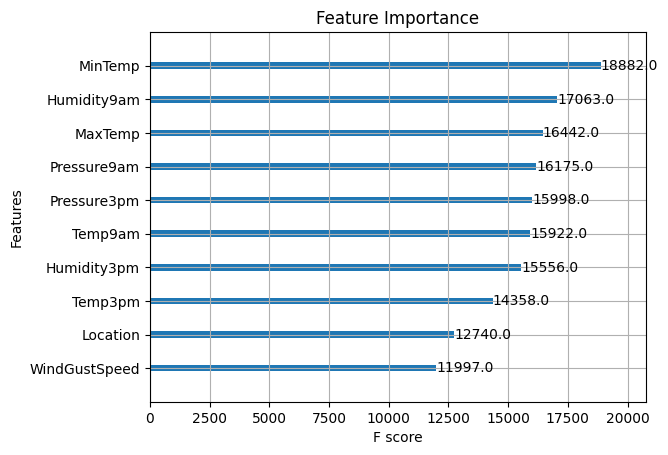

In [63]:
importances = xgb_model.feature_importances_
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance')
plt.show()

In [34]:
accuracy_scores = [100 * i for i in [lg_acc,svc_acc, rf_acc,  gnb_acc, xgb_acc]]
#roc_auc_scores = [lr_roc_auc, svc_roc_auc, rf_roc_auc, gnb_roc_auc, xgb_roc_auc]
#coh_kap_scores = [lr_coh_kap, svc_coh_kap, rf_coh_kap, gnb_coh_kap, xgb_coh_kap]
#tt = [lr_tt, svc_tt, rf_tt, gnb_tt, xgb_tt]

model_data = {
                'Model': ['Logistic Regression','Support Vector Machine','Random Forest','Gaussian Naive Bayes','XGBoost'],
                'Accuracy': accuracy_scores,
                # 'ROC_AUC': roc_auc_scores,
                # 'Cohen_Kappa': coh_kap_scores,
                # 'Time taken': tt,
                # 'Accuracy Time Ratio': np.divide(accuracy_scores,tt)
}

model_analytics = pd.DataFrame(model_data)
model_analytics

,Model,Accuracy
0,Logistic Regression,78.249145
1,Support Vector Machine,78.292202
2,Random Forest,94.703923
3,Gaussian Naive Bayes,75.246448
4,XGBoost,94.735649


<Axes: xlabel='Accuracy', ylabel='Model'>

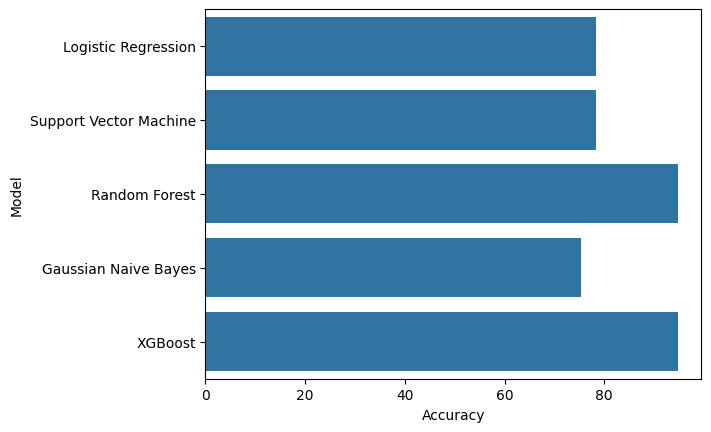

In [35]:
sns.barplot(model_analytics, x='Accuracy',y='Model')

In [36]:
X_train.shape

(176505, 21)

In [37]:
from keras.layers import Dense,BatchNormalization,Dropout,LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import  Adam
from tensorflow.keras import regularizers

In [38]:
# Initialise the  NN
model=Sequential()
# layers
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu',input_dim=21))
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=16,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

/Users/akashmukherjee/Programming/Practise ML/Rain in Austrlia/my_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Compiling ANN
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
# Training ANN
history=model.fit(X_train,y_train,batch_size=32,epochs=40,verbose='auto',validation_split=0.2)

Epoch 1/40
4413/4413 ━━━━━━━━━━━━━━━━━━━━ 3s 506us/step - accuracy: 0.7359 - loss: 0.5141 - val_accuracy: 0.7722 - val_loss: 0.4682
Epoch 2/40
4413/4413 ━━━━━━━━━━━━━━━━━━━━ 2s 488us/step - accuracy: 0.7744 - loss: 0.4698 - val_accuracy: 0.7789 - val_loss: 0.4615
Epoch 3/40
4413/4413 ━━━━━━━━━━━━━━━━━━━━ 2s 476us/step - accuracy: 0.7732 - loss: 0.4695 - val_accuracy: 0.7808 - val_loss: 0.4572
Epoch 4/40
4413/4413 ━━━━━━━━━━━━━━━━━━━━ 2s 477us/step - accuracy: 0.7758 - loss: 0.4643 - val_accuracy: 0.7736 - val_loss: 0.4641
Epoch 5/40
4413/4413 ━━━━━━━━━━━━━━━━━━━━ 2s 477us/step - accuracy: 0.7791 - loss: 0.4600 - val_accuracy: 0.7784 - val_loss: 0.4615
Epoch 6/40
4413/4413 ━━━━━━━━━━━━━━━━━━━━ 2s 475us/step - accuracy: 0.7824 - loss: 0.4559 - val_accuracy: 0.7815 - val_loss: 0.4561
Epoch 7/40
4413/4413 ━━━━━━━━━━━━━━━━━━━━ 2s 483us/step - accuracy: 0.7859 - loss: 0.4514 - val_accuracy: 0.7900 - val_loss: 0.4459
Epoch 8/40
4413/4413 ━━━━━━━━━━━━━━━━━━━━ 2s 490us/step - accuracy: 0.7841 -

In [64]:
#  loss: 186.8842 - accuracy: 0.7961 - val_loss: 495.7950 - val_accuracy: 0.7975

In [65]:
import joblib

joblib.dump(xgb_model,'/Users/akashmukherjee/Programming/Practise ML/Rain in Austrlia/model/XGB_model.joblib')

['/Users/akashmukherjee/Programming/Practise ML/Rain in Austrlia/model/XGB_model.joblib']